# Quantile Regression

[scikit-learn](http://scikit-learn.org/stable/) does not have a quantile regression. [mlinsights](https://sdpython.github.io/doc/dev/mlinsights/index.html) implements a version of it.

In [1]:
from jyquickhelper import add_notebook_menu

add_notebook_menu()

In [2]:
%matplotlib inline

In [3]:
import warnings

warnings.simplefilter("ignore")

## Simple example

We generate some dummy data.

In [4]:
import numpy

X = numpy.random.random(1000)
eps1 = (numpy.random.random(900) - 0.5) * 0.1
eps2 = (numpy.random.random(100)) * 10
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1000, 1))
Y = X.ravel() * 3.4 + 5.6 + eps

In [5]:
from sklearn.linear_model import LinearRegression

clr = LinearRegression()
clr.fit(X, Y)

LinearRegression()

In [6]:
from mlinsights.mlmodel import QuantileLinearRegression

clq = QuantileLinearRegression()
clq.fit(X, Y)

QuantileLinearRegression()

In [7]:
from pandas import DataFrame

data = dict(X=X.ravel(), Y=Y, clr=clr.predict(X), clq=clq.predict(X))
df = DataFrame(data)
df.head()

,X,Y,clr,clq
0,0.337351,6.768441,7.248171,6.753219
1,0.134276,6.106460,6.570011,6.060008
2,0.441892,7.135170,7.597281,7.110077
3,0.737660,8.110642,8.584988,8.119707
4,0.989550,8.958029,9.426163,8.979550


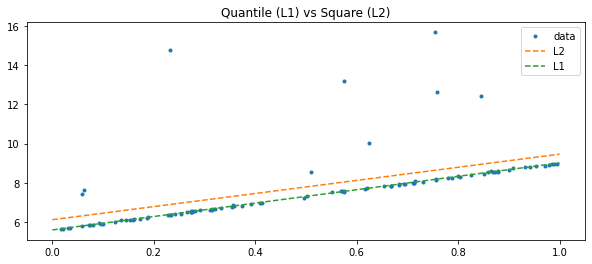

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0] - 1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, ".", label="data")
xx = numpy.array([[0], [1]])
y1 = clr.predict(xx)
y2 = clq.predict(xx)
ax.plot(xx, y1, "--", label="L2")
ax.plot(xx, y2, "--", label="L1")
ax.set_title("Quantile (L1) vs Square (L2)")
ax.legend();

The L1 is clearly less sensible to extremas. The optimization algorithm is based on [Iteratively reweighted least squares](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares). It estimates a linear regression with error L2 then reweights each oberservation with the inverse of the error L1.

In [9]:
clq = QuantileLinearRegression(verbose=True, max_iter=20)
clq.fit(X, Y)

[QuantileLinearRegression.fit] iter=1 error=890.6481655281331
[QuantileLinearRegression.fit] iter=2 error=553.443164087279
[QuantileLinearRegression.fit] iter=3 error=518.5974841726787
[QuantileLinearRegression.fit] iter=4 error=517.8860147236843
[QuantileLinearRegression.fit] iter=5 error=517.5129563462485
[QuantileLinearRegression.fit] iter=6 error=517.2078153294502
[QuantileLinearRegression.fit] iter=7 error=517.0042724262564
[QuantileLinearRegression.fit] iter=8 error=516.8285339347697
[QuantileLinearRegression.fit] iter=9 error=516.6879803415121
[QuantileLinearRegression.fit] iter=10 error=516.5864808002596
[QuantileLinearRegression.fit] iter=11 error=516.5254116312615
[QuantileLinearRegression.fit] iter=12 error=516.4842567183769
[QuantileLinearRegression.fit] iter=13 error=516.4533601589357
[QuantileLinearRegression.fit] iter=14 error=516.4334316544625
[QuantileLinearRegression.fit] iter=15 error=516.4204631587874
[QuantileLinearRegression.fit] iter=16 error=516.4064255197134
[Q

QuantileLinearRegression(max_iter=20, verbose=True)

In [10]:
clq.score(X, Y)

0.5163817712143421

## Regression with various quantiles

In [11]:
import numpy

X = numpy.random.random(1200)
eps1 = (numpy.random.random(900) - 0.5) * 0.5
eps2 = (numpy.random.random(300)) * 2
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1200, 1))
Y = X.ravel() * 3.4 + 5.6 + eps + X.ravel() * X.ravel() * 8

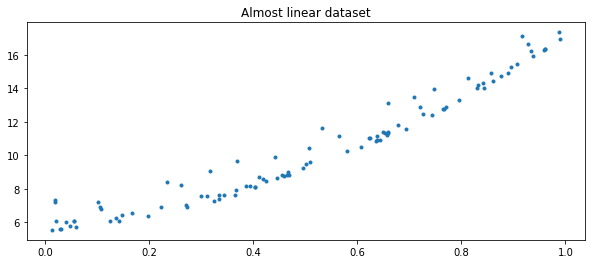

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0] - 1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, ".", label="data")
ax.set_title("Almost linear dataset");

In [13]:
clqs = {}
for qu in [0.1, 0.25, 0.5, 0.75, 0.9]:
    clq = QuantileLinearRegression(quantile=qu)
    clq.fit(X, Y)
    clqs["q=%1.2f" % qu] = clq

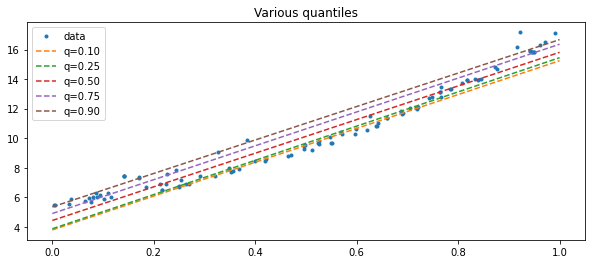

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0] - 1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, ".", label="data")
xx = numpy.array([[0], [1]])
for qu in sorted(clqs):
    y = clqs[qu].predict(xx)
    ax.plot(xx, y, "--", label=qu)
ax.set_title("Various quantiles")
ax.legend();